In [1]:
cd ..

/home/astro/phrdhx/automated_exocomet_hunt


In [2]:
from analysis_tools_cython import *
import numpy as np
np.set_printoptions(threshold=np.inf)

In [4]:
#%run -i batch_analyse_test.py betapic/ -f "corrected flux" -p

Timestep of lightcurve:  30.0 minutes.
Maximum transit chance:
   Time = 1473.53 days.
   Duration = 0.52 days.
   T = -20.7
   T/sigma = -6.3
Transit depth = -0.001455
Asym score: 1.0438
Quality flags: 0
maybeTransit


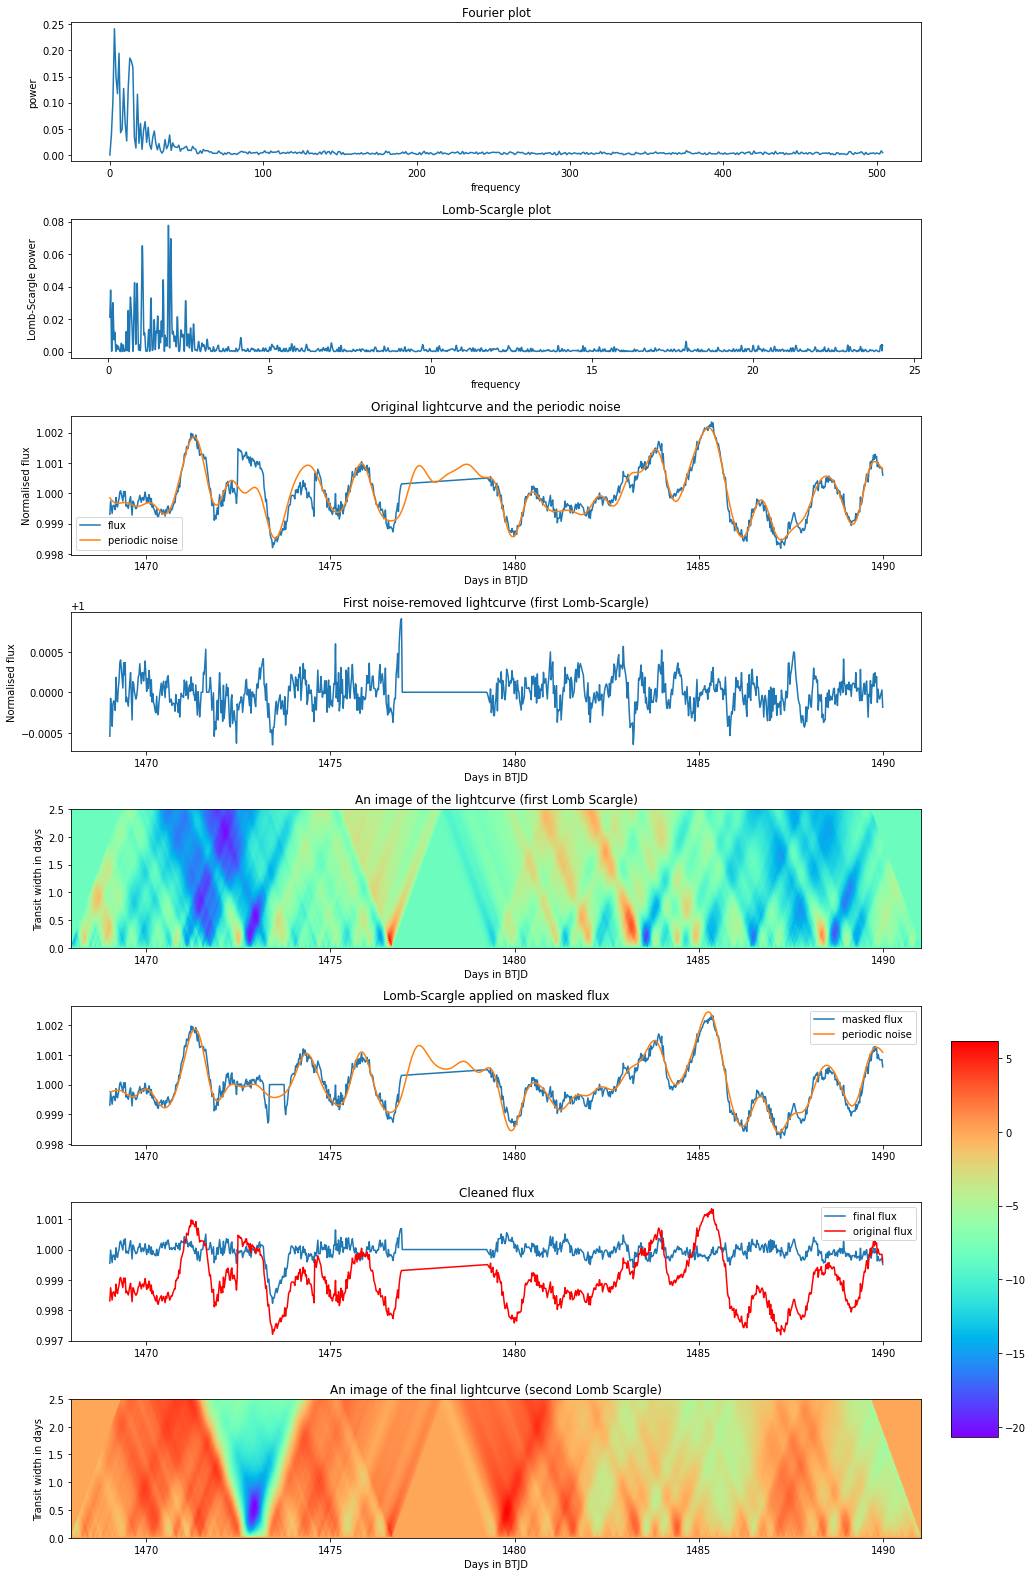

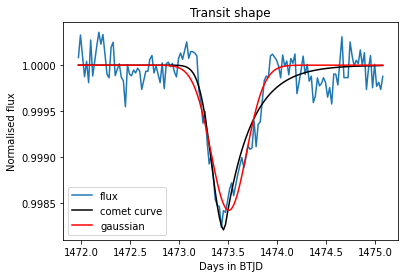

In [16]:
%run -i single_analysis.py /storage/astro2/phrdhx/tesslcs/tesslcs_sector_6_104/tesslcs_tmag_7_8/tesslc_7421463.pkl

## Beta Pictoris

#### `single_analysis` on 30 minute - Sector 6

Timestep of lightcurve:  30.0 minutes.
Maximum transit chance:
   Time = 1486.3 days.
   Duration = 0.75 days.
   T = -27.6
   T/sigma = -5.7
Transit depth = -0.00114
Asym score: 1.0707
Quality flags: 0
maybeTransit


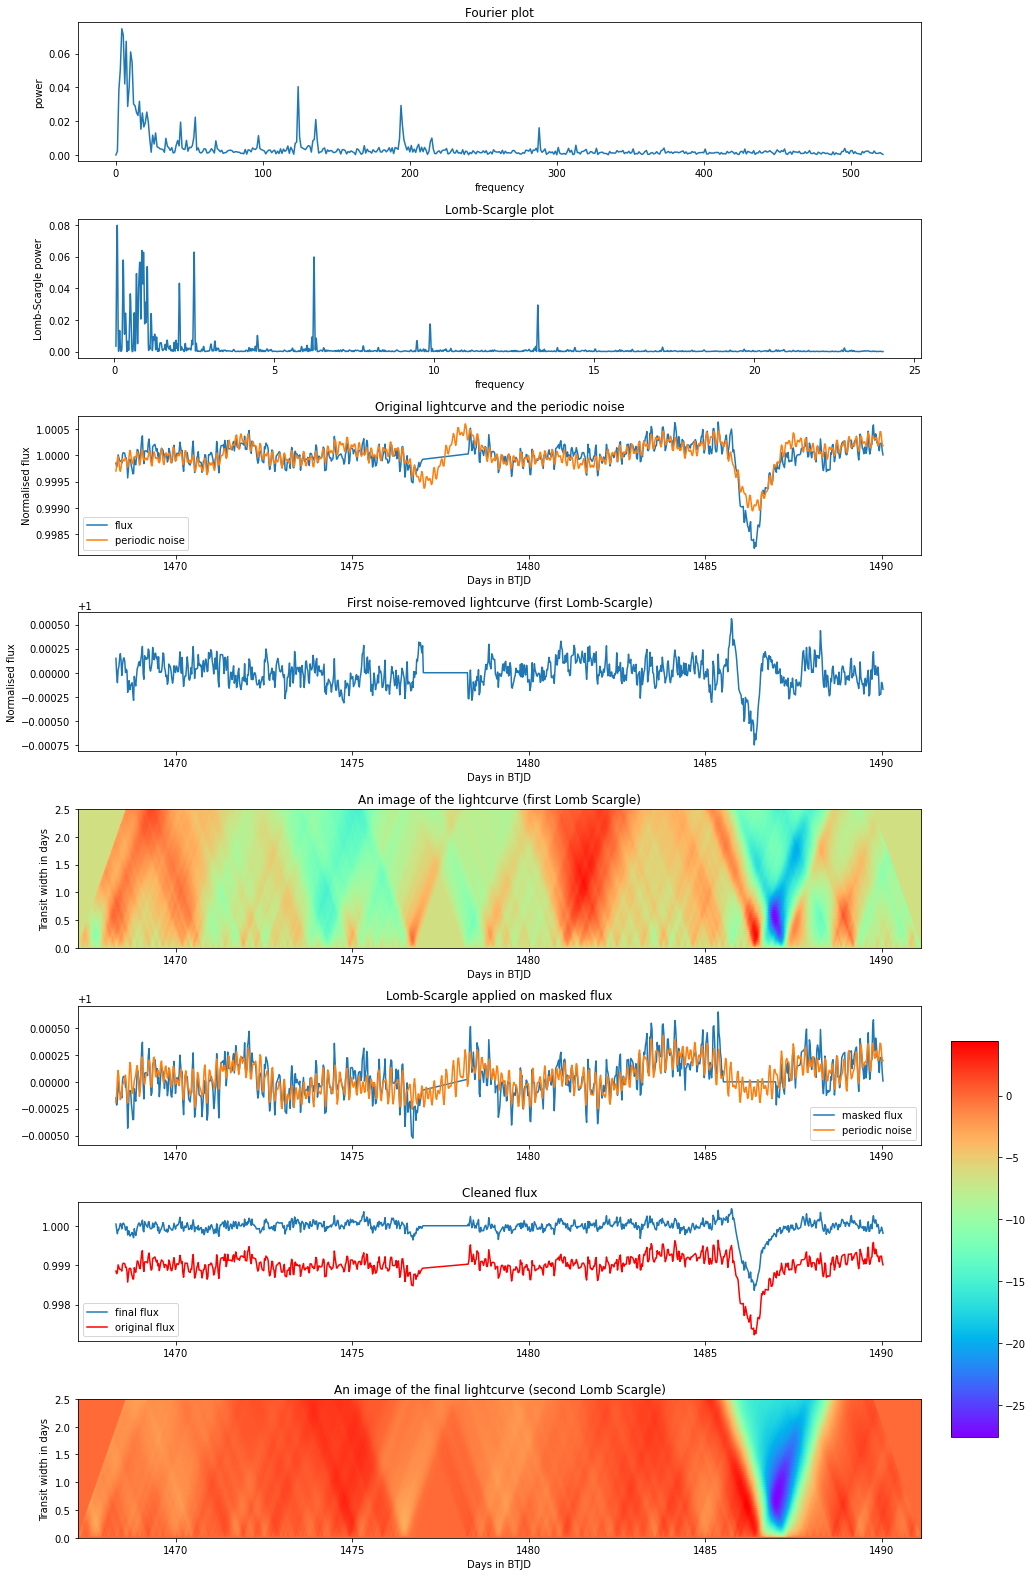

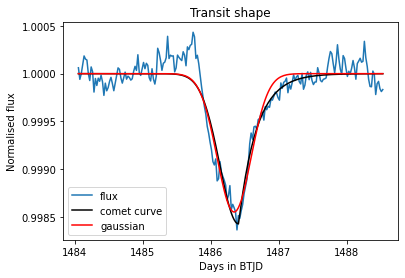

In [3]:
%run -i single_analysis.py /storage/astro2/phsqzm/TESS/SPOC_30min/S06/target/0000/0002/7057/7175/hlsp_tess-spoc_tess_phot_0000000270577175-s0006_tess_v1_lc.fits

### 30 minute - Sector 5

Timestep of lightcurve:  30.0 minutes.
Maximum transit chance:
   Time = 1459.14 days.
   Duration = 0.35 days.
   T = -15.0
   T/sigma = -5.1
Transit depth = -0.000398
Asym score: 1.1442
Quality flags: 0
maybeTransit


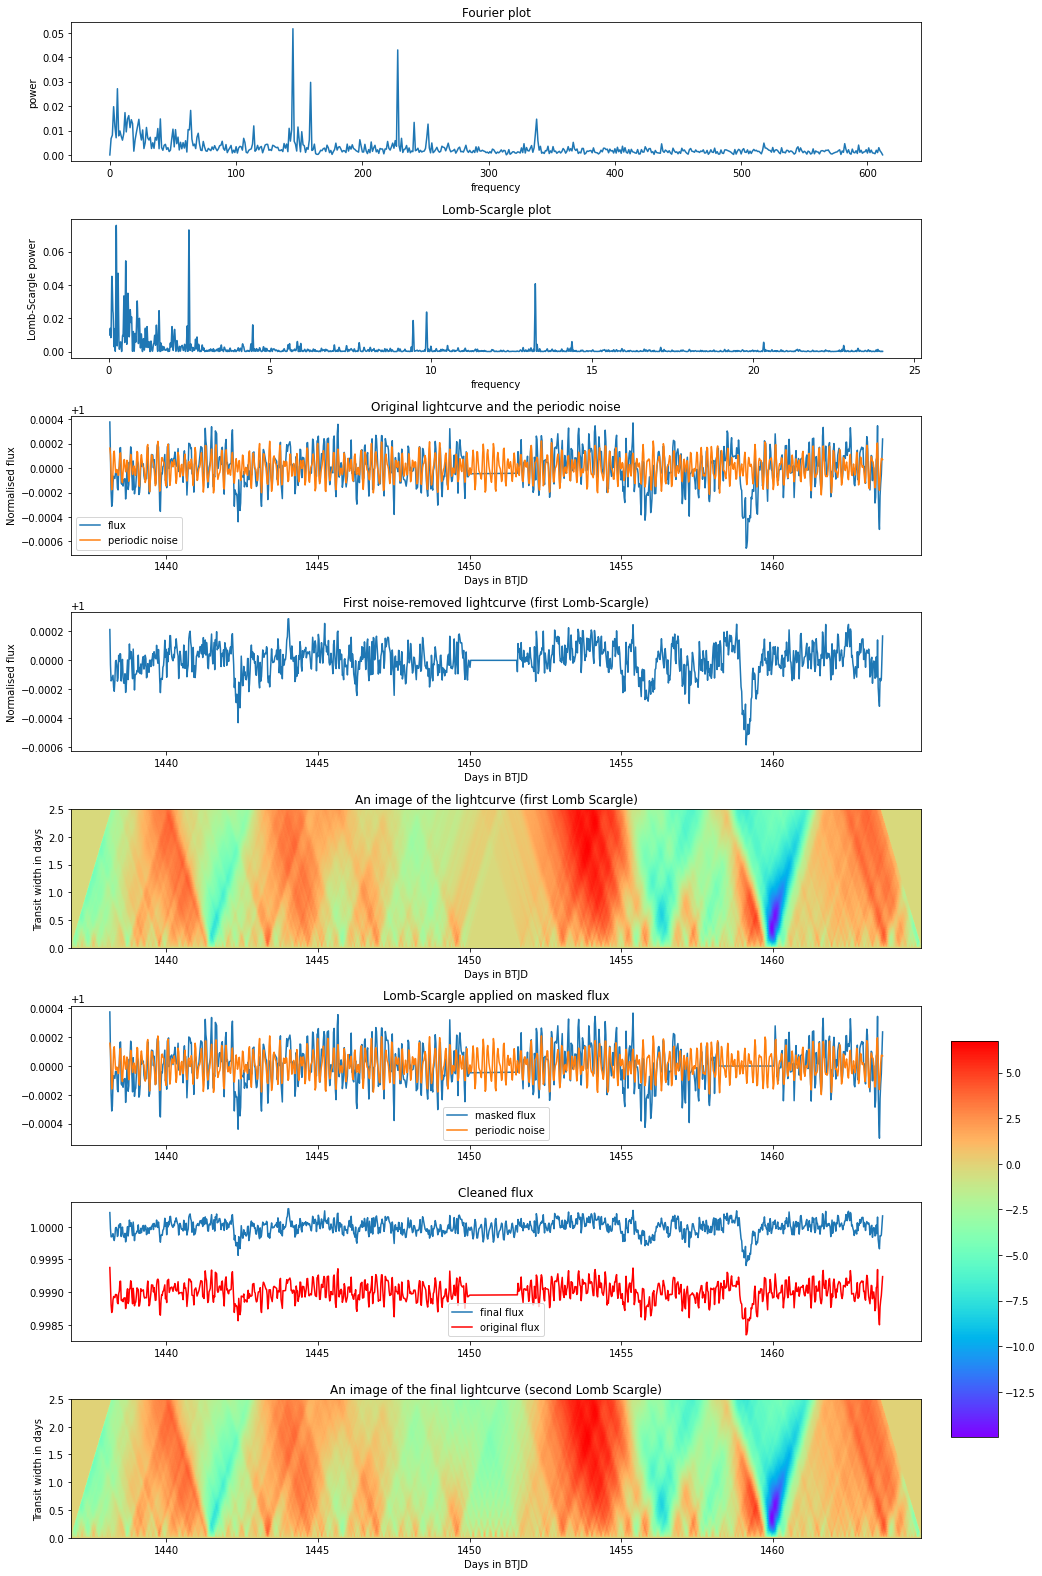

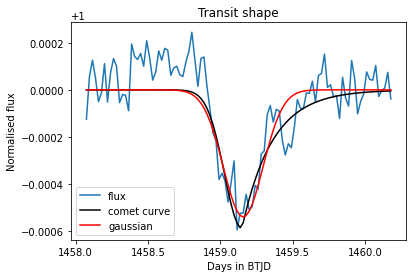

In [5]:
%run -i single_analysis.py /storage/astro2/phsqzm/TESS/SPOC_30min/S05/target/0000/0002/7057/7175/hlsp_tess-spoc_tess_phot_0000000270577175-s0005_tess_v1_lc.fits

### 30 minutes - Sector 7

Timestep of lightcurve:  30.0 minutes.
Maximum transit chance:
   Time = 1492.53 days.
   Duration = 1.62 days.
   T = -7.3
   T/sigma = -2.7
Transit depth = -4.4e-05
end


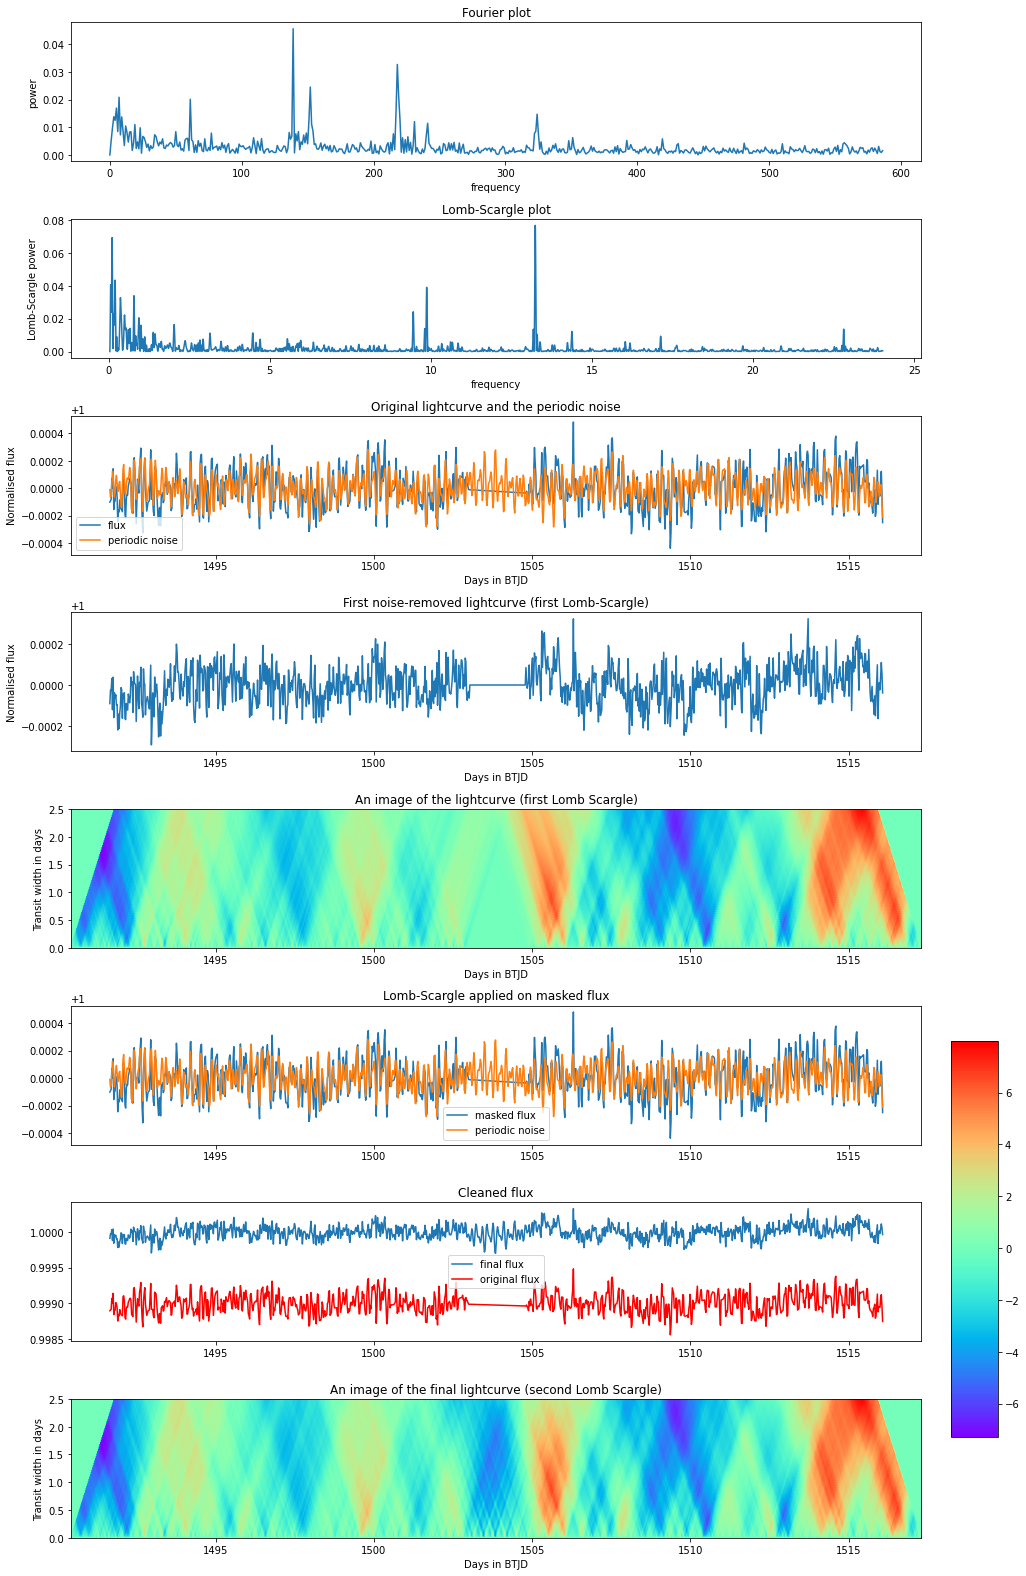

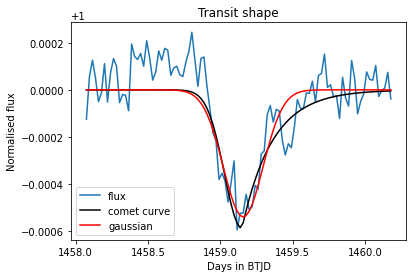

In [6]:
%run -i single_analysis.py /storage/astro2/phsqzm/TESS/SPOC_30min/S07/target/0000/0002/7057/7175/hlsp_tess-spoc_tess_phot_0000000270577175-s0007_tess_v1_lc.fits

### 30 minutes - Sector 33

Timestep of lightcurve:  10.0 minutes.
Maximum transit chance:
   Time = 2221.67 days.
   Duration = 1.25 days.
   T = -7.7
   T/sigma = -3.1
Transit depth = -0.000468
Asym score: 0.9435
Quality flags: 0
end


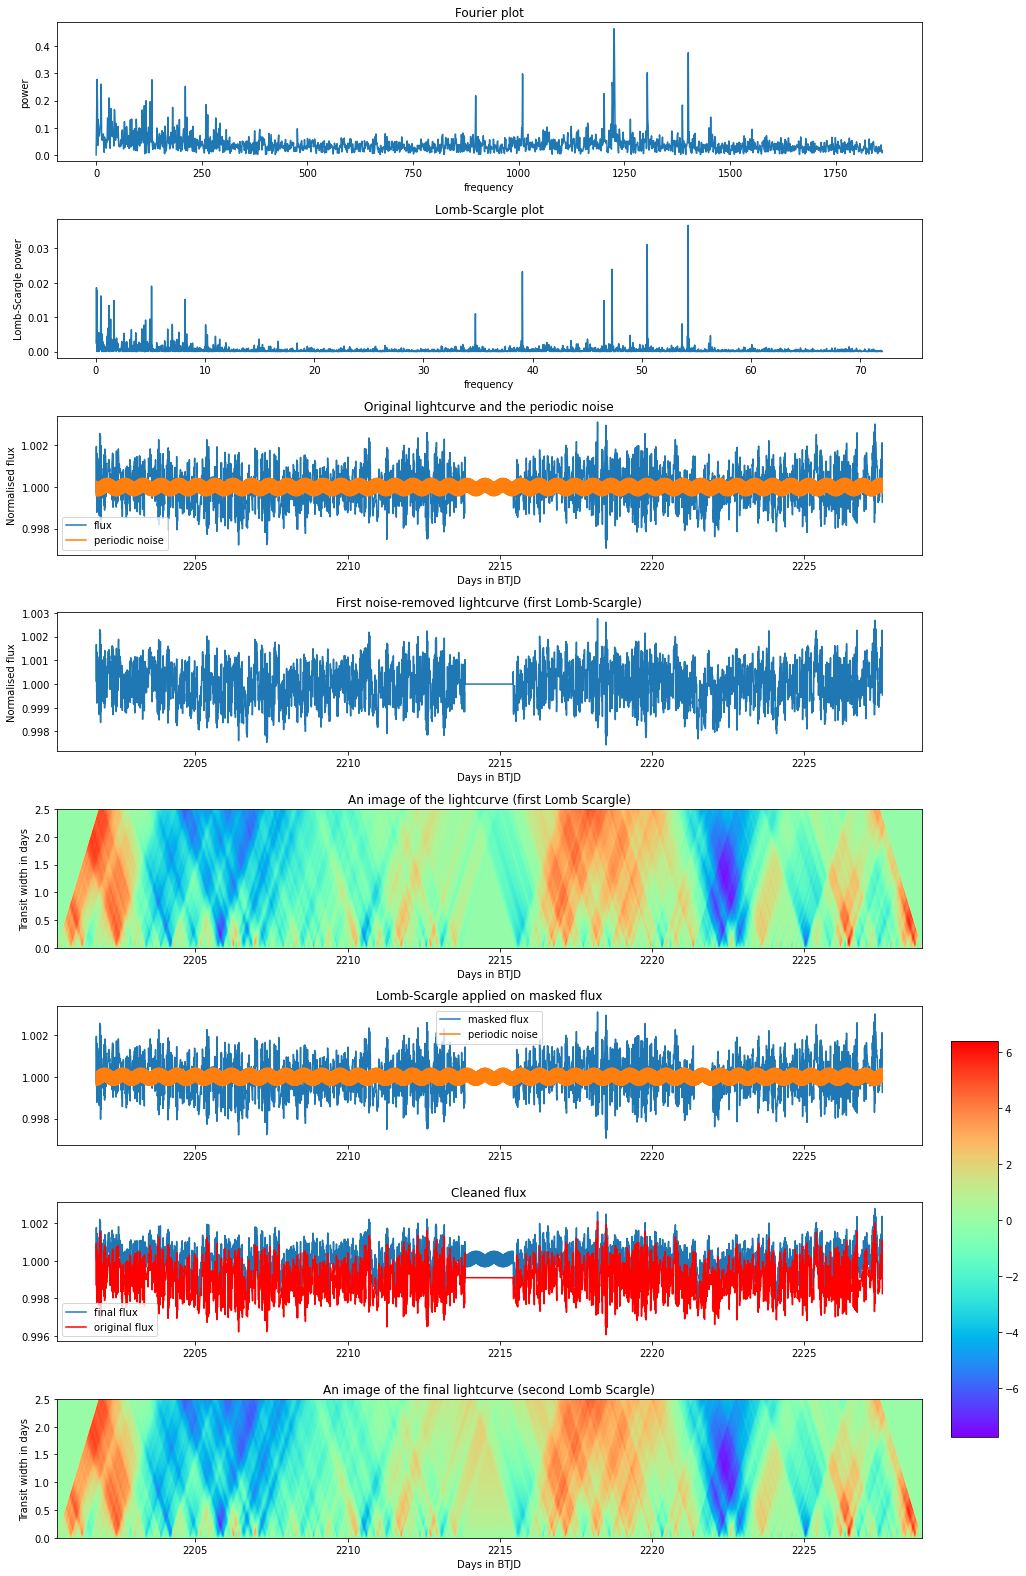

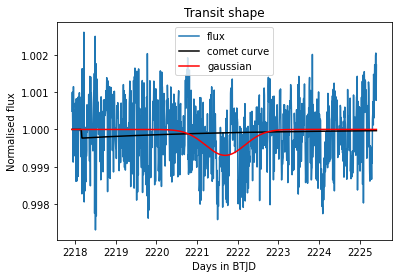

In [7]:
%run -i single_analysis.py /storage/astro2/phrvdf/TESS/SPOC_30min/S33/target/0000/0002/7057/7175/hlsp_tess-spoc_tess_phot_0000000270577175-s0033_tess_v1_lc.fits

#### `single_analysis` on 2 minute - Sector 6

In [8]:
# %run -i single_analysis.py tess_testlcs/spoc_2min/S6/tess2018349182459-s0006-0000000270577175-0126-s_lc.fits

#### `single_analysis` on Kepler

Timestep of lightcurve:  29.425 minutes.
Maximum transit chance:
   Time = 1175.73 days.
   Duration = 0.49 days.
   T = -41.7
   T/sigma = -9.1
Transit depth = -0.000855
Asym score: 1.2715
Quality flags: 0
maybeTransit


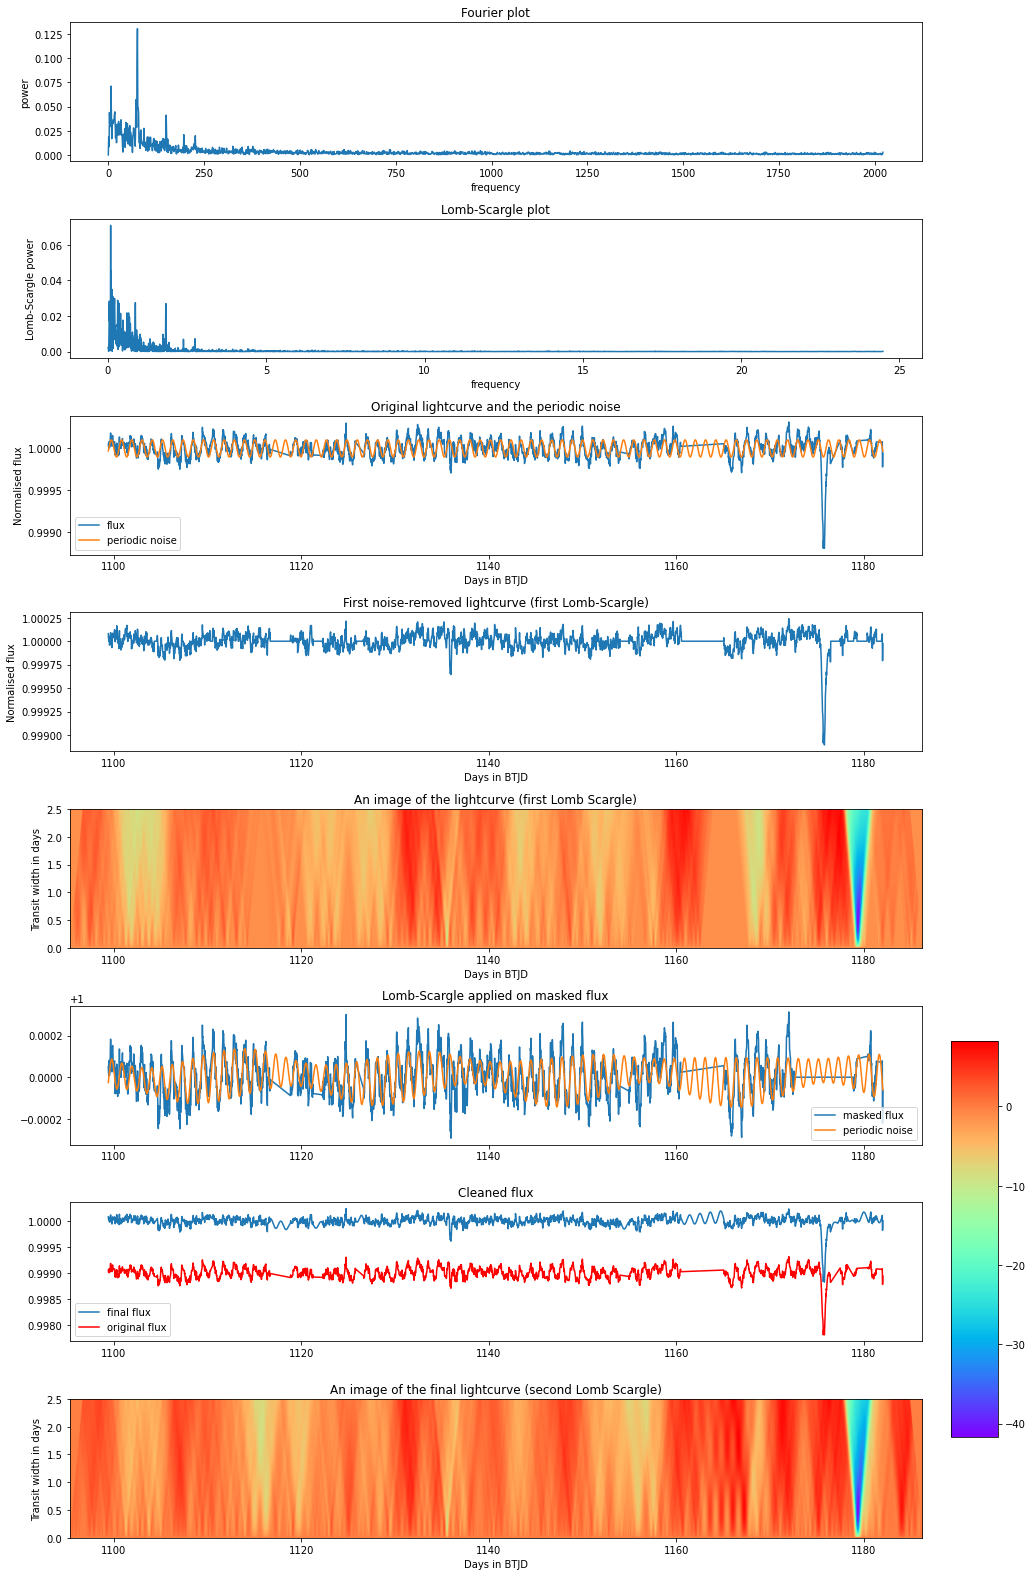

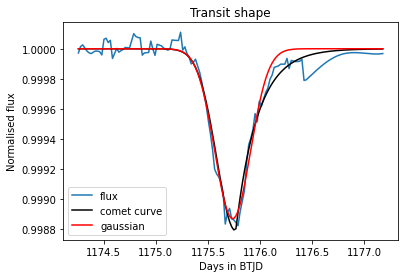

In [9]:
%run -i single_analysis.py kepler/kplr003542116-2012088054726_llc.fits 

---

## WASP 107-b; exoplanet with losing atmosphere

Timestep of lightcurve:  30.0 minutes.
Maximum transit chance:
   Time = 1574.14 days.
   Duration = 0.1 days.
   T = -16.7
   T/sigma = -8.3
Transit depth = -0.021194
Asym score: 0.6022
Quality flags: 0
maybeTransit


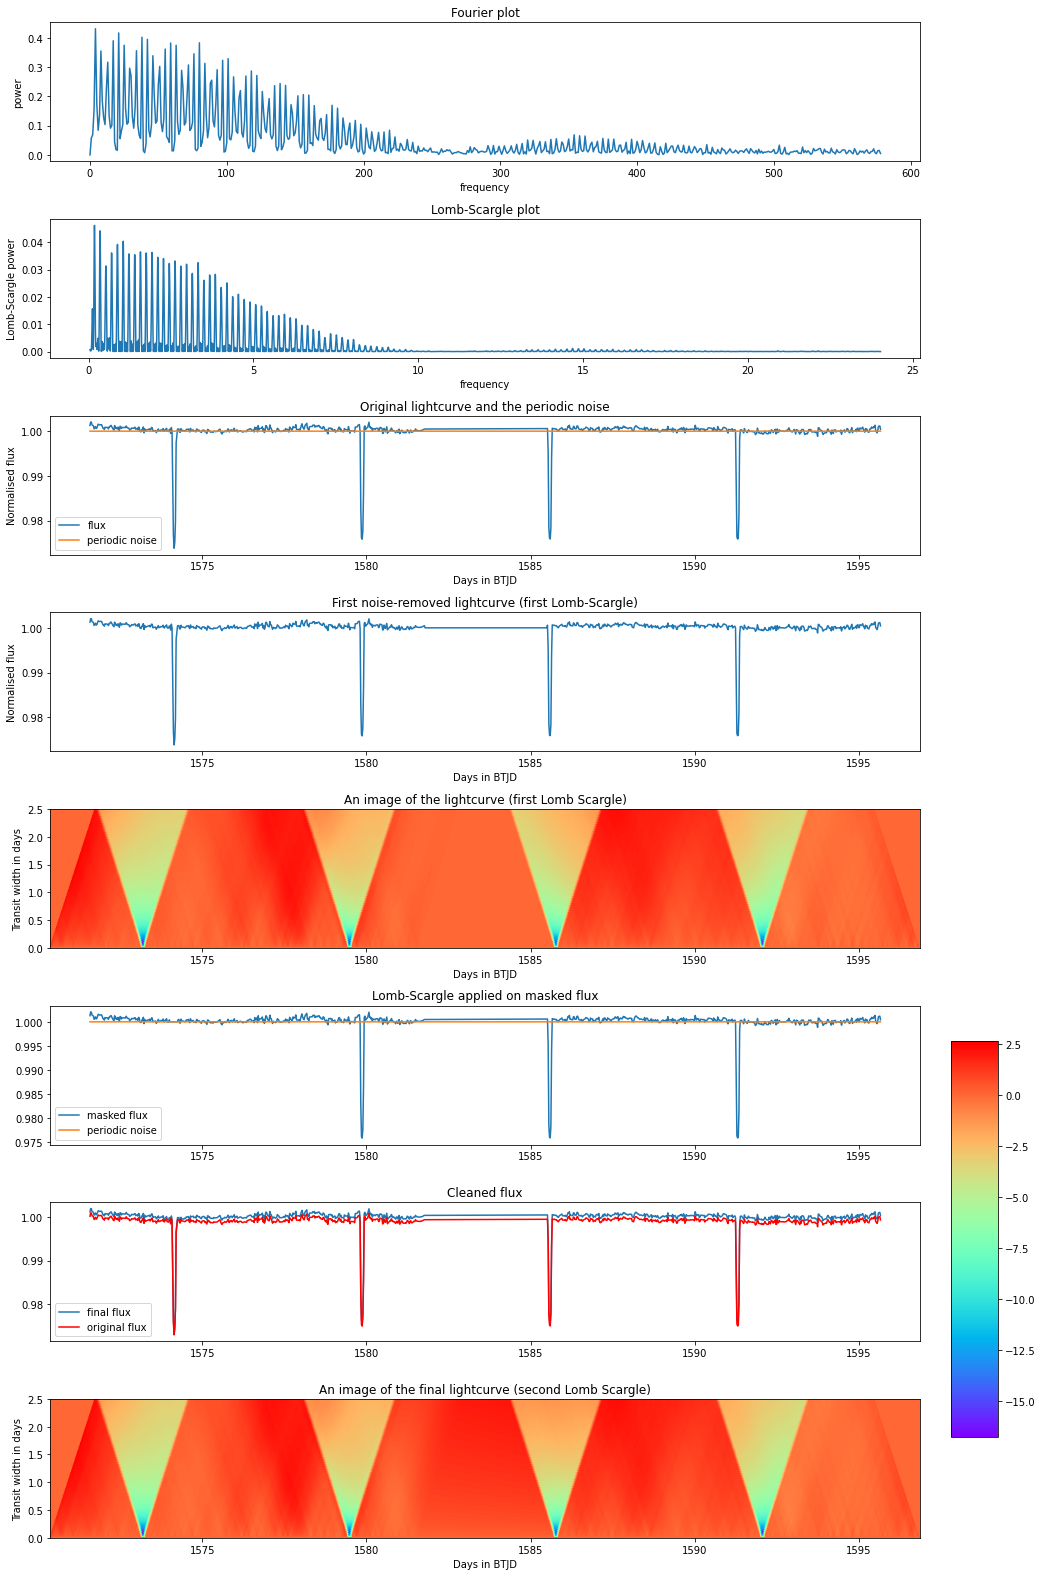

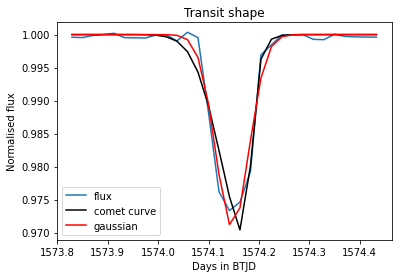

In [10]:
%run -i single_analysis.py /storage/astro2/phsqzm/TESS/SPOC_30min/S10/target/0000/0004/2930/2040/hlsp_tess-spoc_tess_phot_0000000429302040-s0010_tess_v1_lc.fits

---

## Eleanor

In [11]:
import eleanor
import pandas as pd
import data
import loaders

In [12]:
star = eleanor.Source(tic=270577175, sector=6)
data = eleanor.TargetData(star, height=15, width=15, bkg_size=31, do_psf=False, do_pca=True, regressors='corner')
q = data.quality == 0

INFO: Found cached file ./mastDownload/HLSP/hlsp_eleanor_tess_ffi_postcard-s0006-3-3-cal-1686-0592_tess_v2_pc/hlsp_eleanor_tess_ffi_postcard-s0006-3-3-cal-1686-0592_tess_v2_bkg.fits with expected size 61162560. [astroquery.query]
INFO: Found cached file ./mastDownload/HLSP/hlsp_eleanor_tess_ffi_postcard-s0006-3-3-cal-1686-0592_tess_v2_pc/hlsp_eleanor_tess_ffi_postcard-s0006-3-3-cal-1686-0592_tess_v2_pc.fits with expected size 122411520. [astroquery.query]
INFO: Found cached file ./mastDownload/HLSP/hlsp_eleanor_tess_ffi_postcard-s0006-3-3-cal-1686-0592_tess_v2_pc/hlsp_eleanor_tess_ffi_postcard-s0006-3-3_tess_v2_pm.txt with expected size 185294. [astroquery.query]


In [21]:
star.chip

3

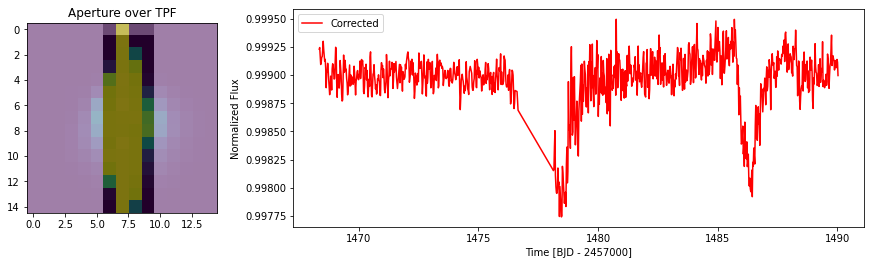

In [13]:
eleanor.TargetData.custom_aperture(data, shape='rectangle', h=15,w=4)
eleanor.TargetData.get_lightcurve(data)

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15,4), gridspec_kw={'width_ratios':[1,3]})
ax1.imshow(data.tpf[0])
ax1.imshow(data.aperture, cmap='Greys', alpha=0.5)
ax1.set_title('Aperture over TPF')
#plt.imshow(data.aperture)

#ax2.plot(data.time[q], data.raw_flux[q]/np.nanmedian(data.raw_flux[q]), 'k', label='Raw')
ax2.plot(data.time[q], data.corr_flux[q]/np.nanmedian(data.corr_flux[q]) - 0.001, 'r', label='Corrected')

ax2.legend()
ax2.set_xlabel('Time [BJD - 2457000]')
ax2.set_ylabel('Normalized Flux');

In [14]:
df = pd.DataFrame(data=[data.time[q],data.corr_flux[q],data.quality[q]]).T
columns = ['time','corr_f','quality']
df.columns = columns

In [15]:
df

time        corr_f  quality
0    1468.345849  4.454004e+06      0.0
1    1468.366682  4.454068e+06      0.0
2    1468.408349  4.453397e+06      0.0
3    1468.429182  4.453477e+06      0.0
4    1468.450016  4.453685e+06      0.0
..           ...           ...      ...
932  1489.929055  4.453470e+06      0.0
933  1489.949888  4.453266e+06      0.0
934  1489.991554  4.453598e+06      0.0
935  1490.012387  4.453489e+06      0.0
936  1490.033220  4.452960e+06      0.0

[937 rows x 3 columns]

In [16]:
df.to_csv('test.csv',index=False)

---

In [17]:
%run -i single_analysis.py test.csv

UnboundLocalError: local variable 'lc' referenced before assignment

### TASOC - need to fix interpolation step

18
Timestep of lightcurve:  30.0 minutes.
Maximum transit chance:
   Time = 1485.6 days.
   Duration = 0.5 days.
   T = -5.4
   T/sigma = -1.5
Transit depth = -6.107827
Asym score: 1.0113
Quality flags: 1
maybeTransit


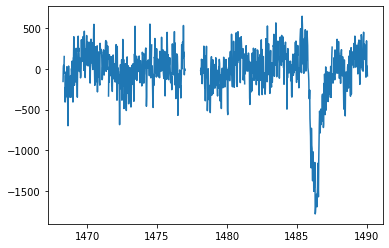

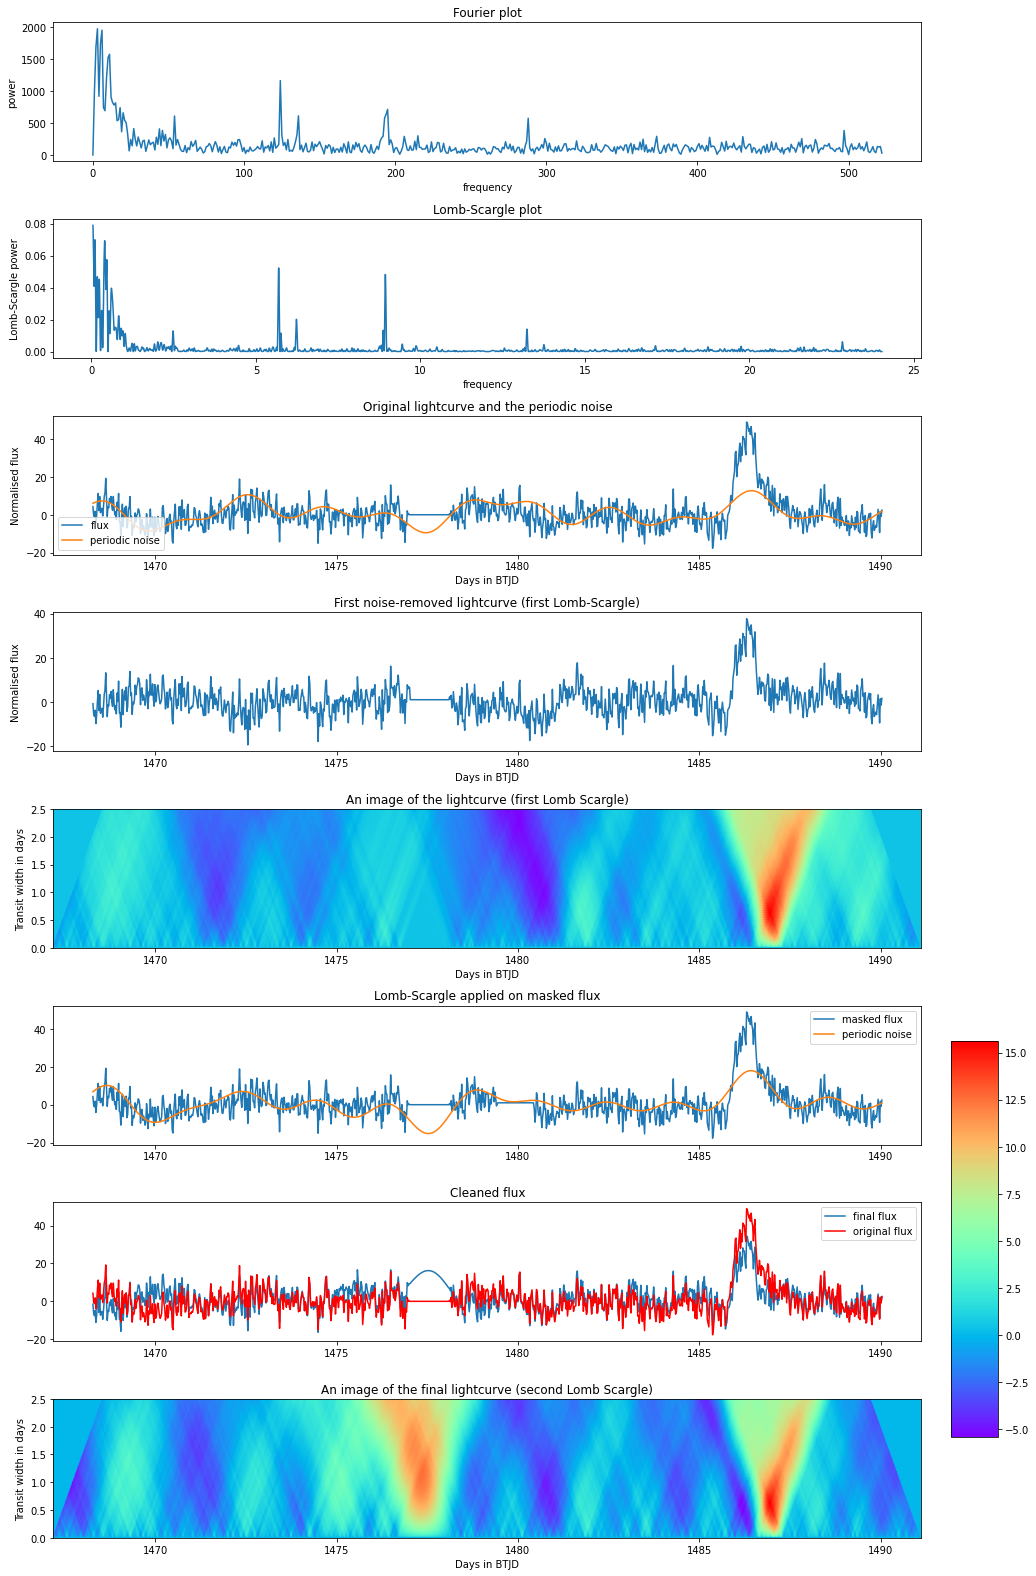

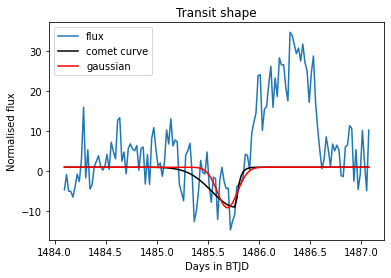

In [18]:
%run -i single_analysis.py betapic/tess00270577175-s006-3-3-c1800-dr08-v05-tasoc-cbv_lc.fits

---

### QLP

Timestep of lightcurve:  30.0 minutes.
Maximum transit chance:
   Time = 1486.43 days.
   Duration = 1.0 days.
   T = -25.0
   T/sigma = -4.5
Transit depth = -0.000999
Asym score: 1.1506
Quality flags: 0
end


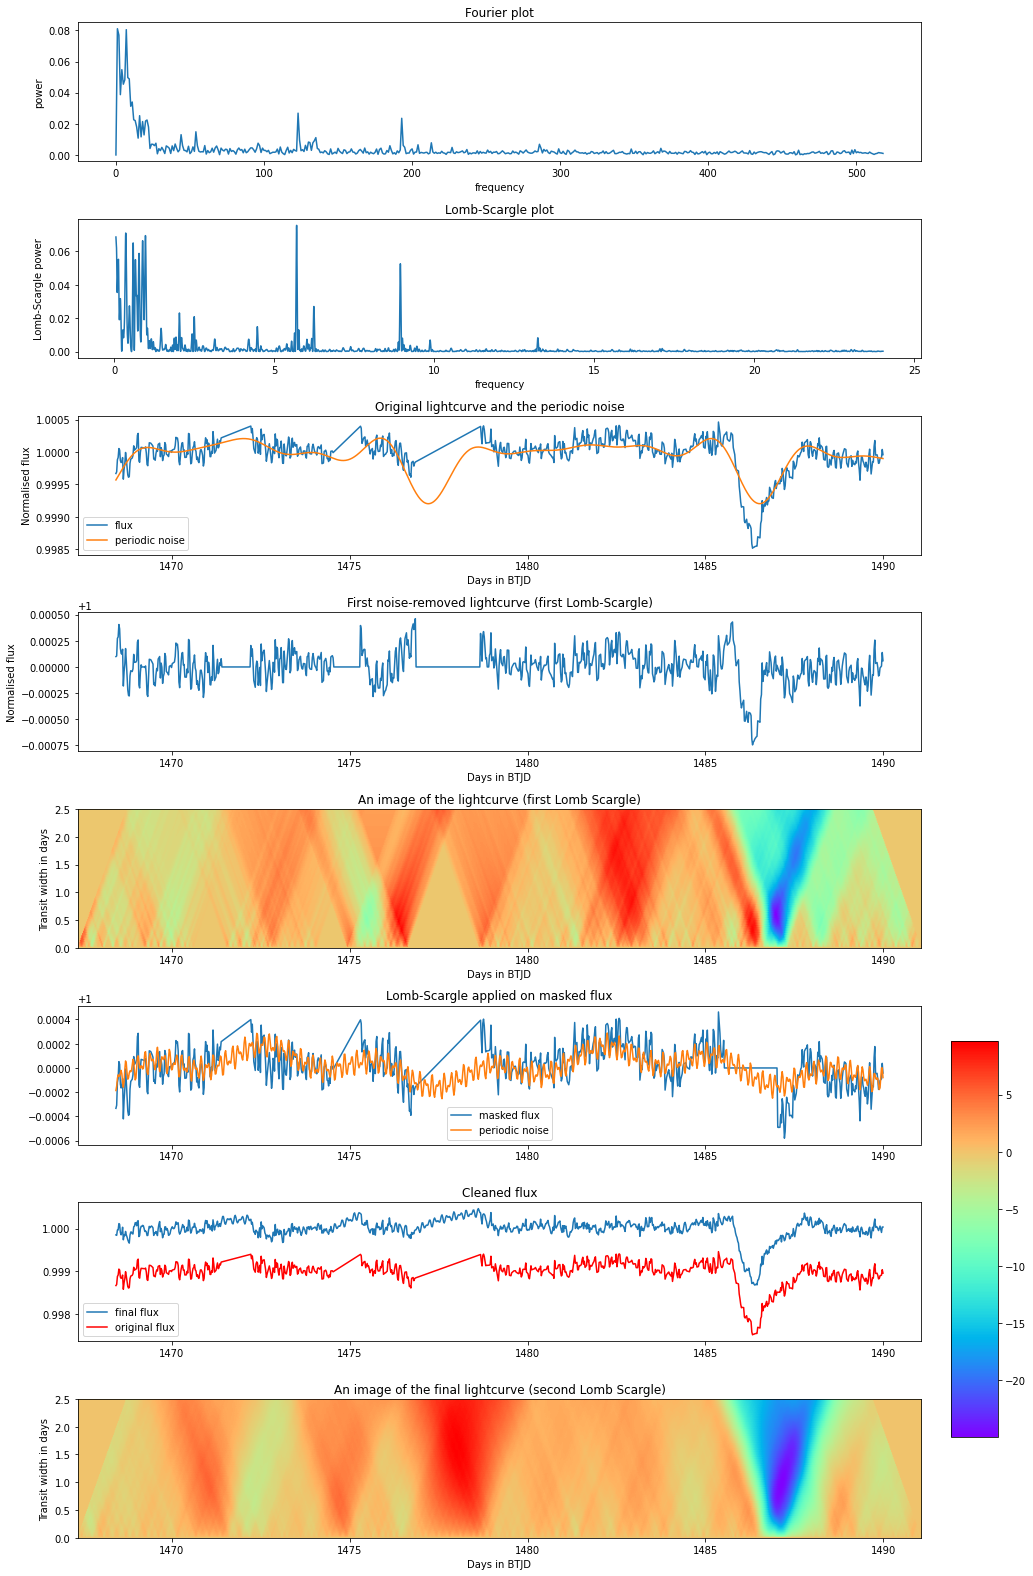

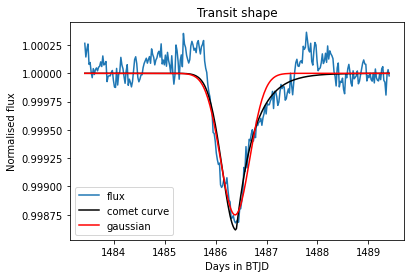

In [24]:
%run -i single_analysis.py betapic/hlsp_qlp_tess_ffi_s0006-0000000270577175_tess_v01_llc.fits

## 5 Vulpeculae - Trying out a CHEOPS target; no exocomets

Timestep of lightcurve:  30.0 minutes.
Maximum transit chance:
   Time = 1705.01 days.
   Duration = 0.06 days.
   T = -14.2
   T/sigma = -17.1
Transit depth = -0.004767
Asym score: 0.9992
Quality flags: 0
maybeTransit


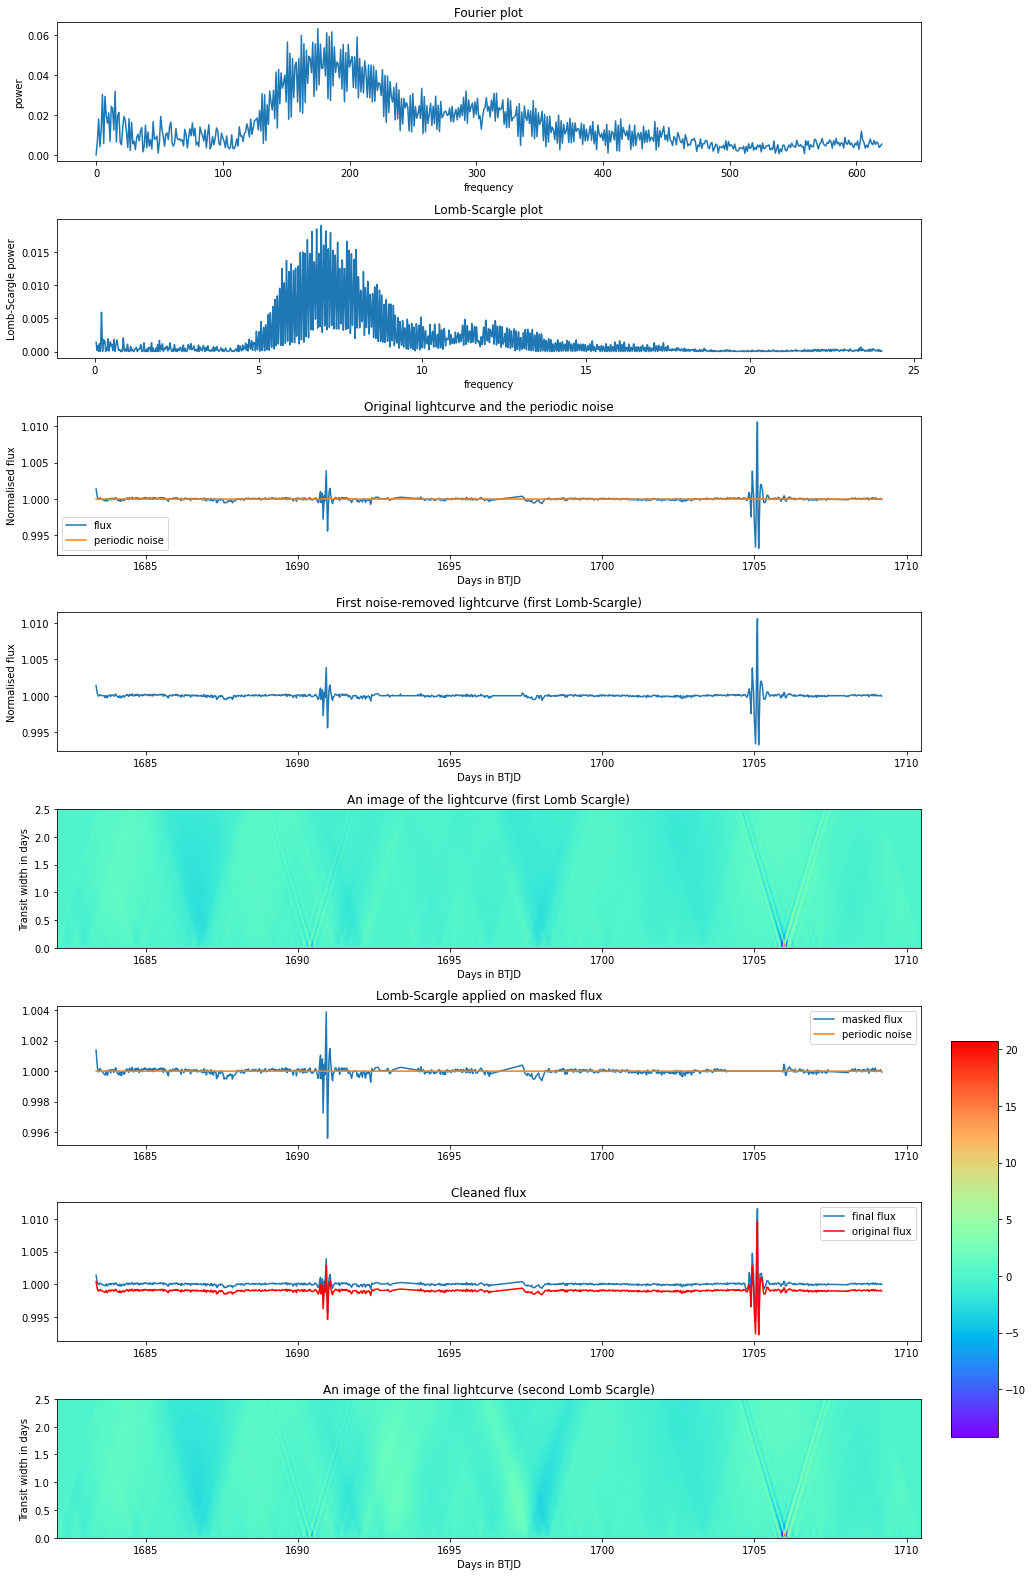

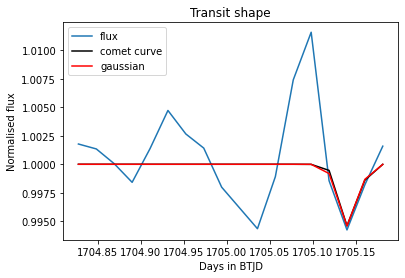

In [25]:
%run -i single_analysis.py tesslcs_sector_14_104_2_min_cadence_targets_tesslc_359600295.pkl -s 14

Timestep of lightcurve:  30.0 minutes.
Maximum transit chance:
   Time = 1705.85 days.
   Duration = 1.9 days.
   T = -22.2
   T/sigma = -4.8
Transit depth = -0.00015
end


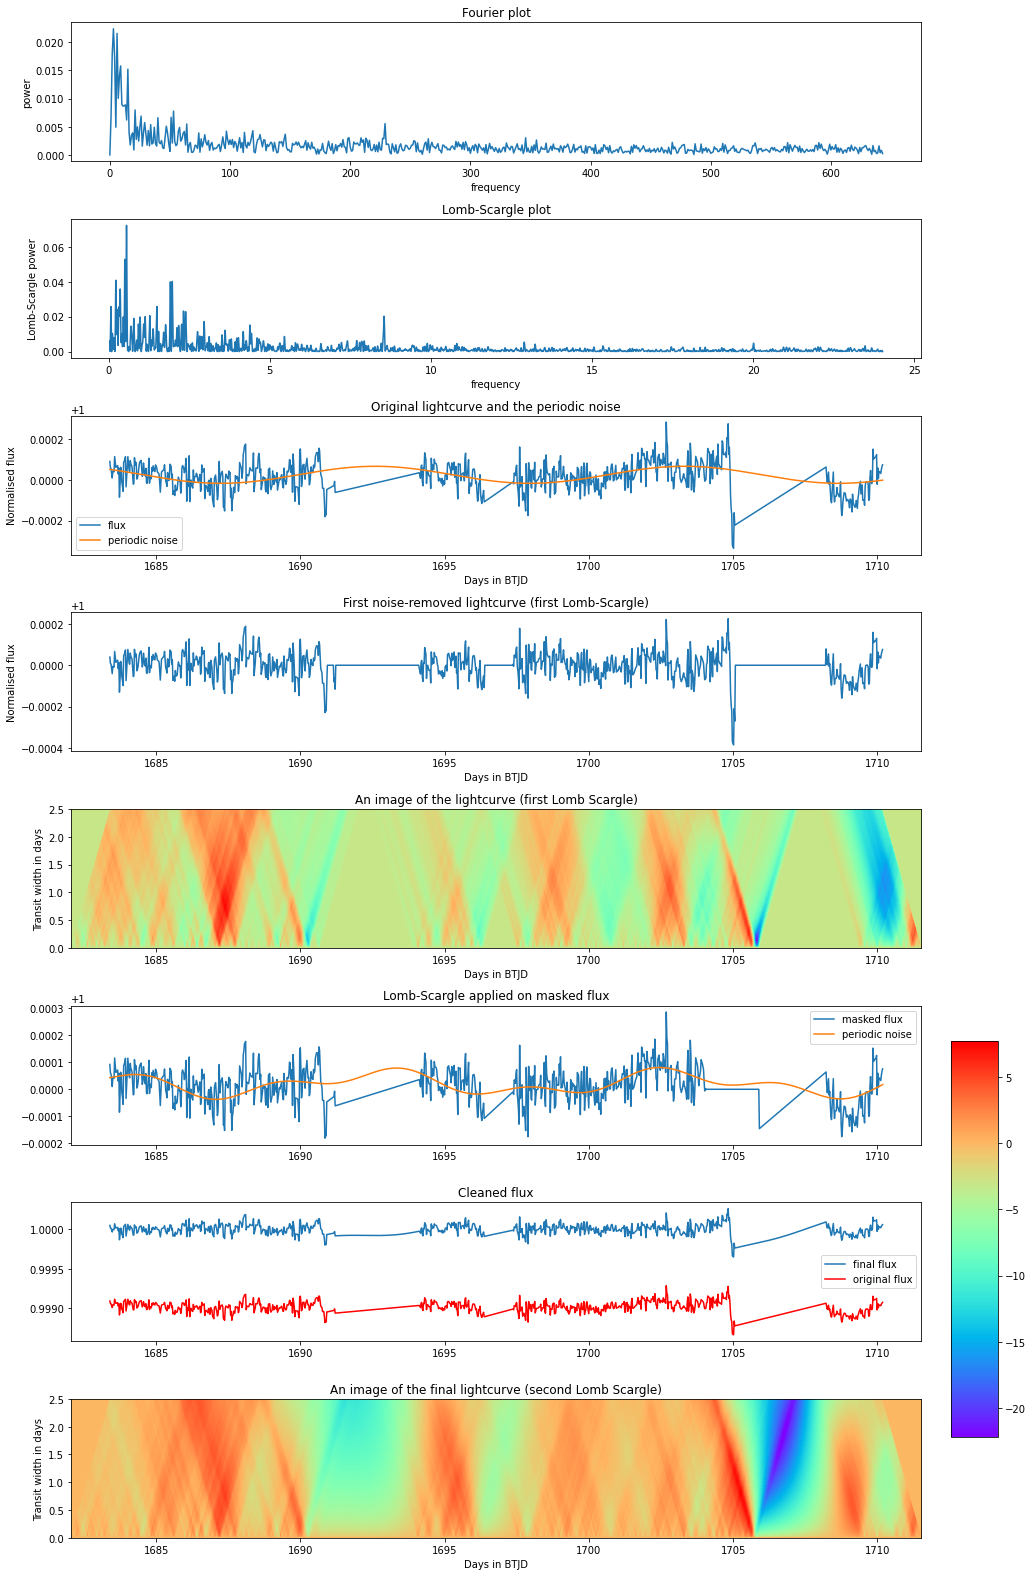

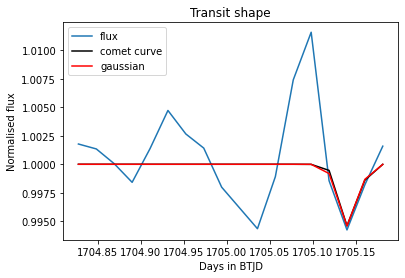

In [27]:
%run -i single_analysis.py /storage/astro2/phsqzm/TESS/SPOC_30min/S14/target/0000/0003/5960/0295/hlsp_tess-spoc_tess_phot_0000000359600295-s0014_tess_v1_lc.fits -q